Wczytajmy dane

In [442]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

#Zdefiniujemy domyślne rozmiary czcionek służące do generowania ładnych rysunków
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

datapath = Path() / "data" / "housing" # Definiujemy ścieżkę do bieżącego katalogu
housing = pd.read_csv(datapath / "housing.csv")

In [443]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [444]:

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [445]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [446]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [447]:
housing.describe(include=object)

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


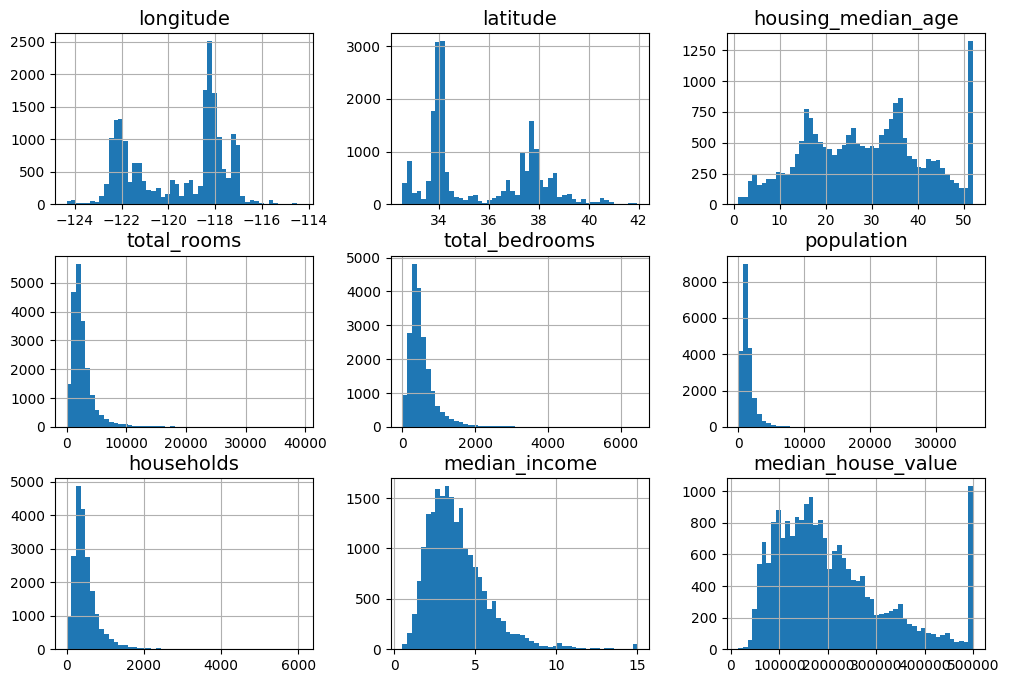

In [448]:
housing.hist(bins=50, figsize=(12,8))
plt.show()

In [449]:
#Utwórzmy zbiór testowy
from sklearn.model_selection import train_test_split

In [450]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [451]:

housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

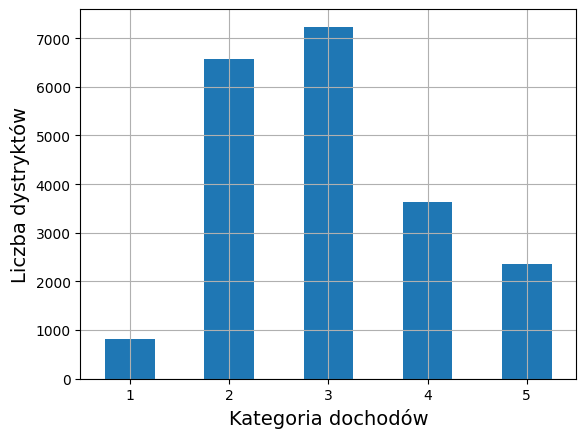

In [452]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Kategoria dochodów")
plt.ylabel("Liczba dystryktów")
plt.show()

In [453]:
df_train_rand_samp, df_test_rand_samp = train_test_split(
    housing, test_size=0.2, random_state=42)
df_train, df_test = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [454]:

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

compare_samp = pd.DataFrame({
    "Łącznie (%)": income_cat_proportions(housing),
    "Warstwowe (%)": income_cat_proportions(df_test),
    "Losowe (%)": income_cat_proportions(df_test_rand_samp),
}).sort_index()
compare_samp.index.name = "Kategoria dochodów"
compare_samp["Błąd - warstwowe (%)"] = (compare_samp["Warstwowe (%)"] /
                                     compare_samp["Łącznie (%)"]- 1 )
compare_samp["Błąd - losowe (%)"] = (compare_samp["Losowe (%)"] /
                                     compare_samp["Łącznie (%)"] - 1)
(compare_samp * 100).round(2)

,Łącznie (%),Warstwowe (%),Losowe (%),Błąd - warstwowe (%),Błąd - losowe (%)
Kategoria dochodów,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [455]:
for set_ in (df_train, df_test):
    set_.drop("income_cat", axis=1, inplace=True)

In [456]:
df_train_eda = df_train.copy()

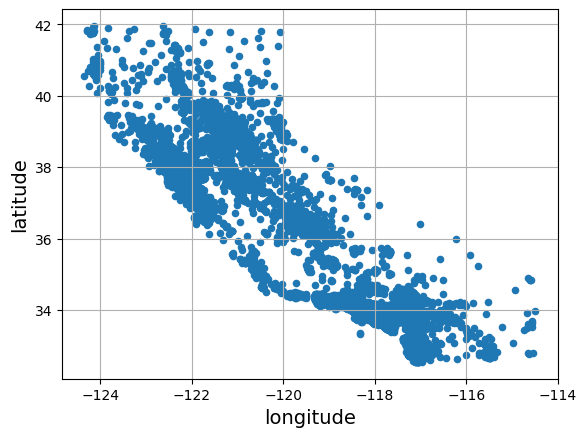

In [457]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid = True)
plt.show()

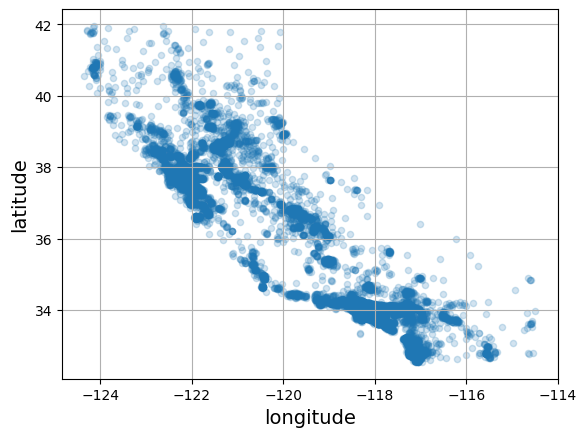

In [458]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid = True, alpha=0.2)
plt.show()

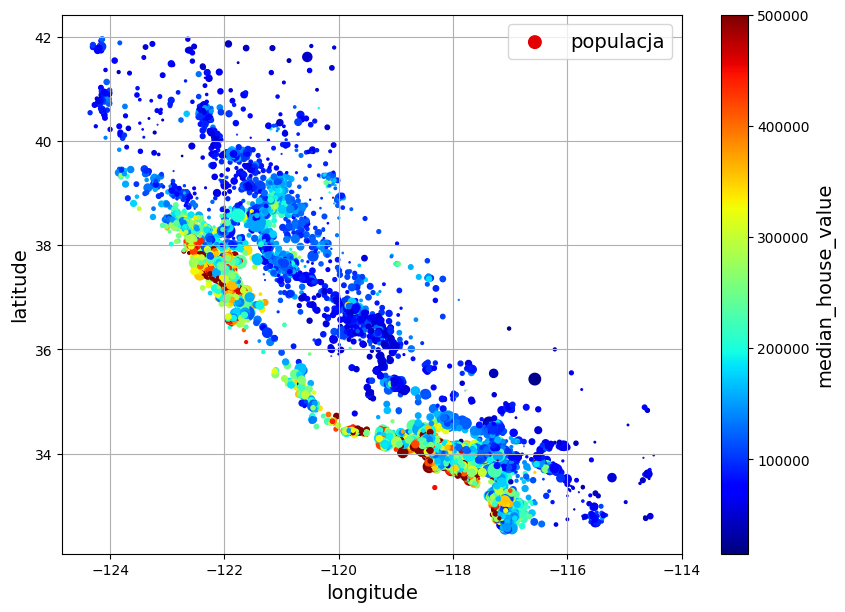

In [459]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid = True,
                  s=df_train_eda["population"] / 100, label= "populacja",
                  c="median_house_value", cmap="jet", colorbar = True,
                  legend = True, sharex = False, figsize=(10, 7))
plt.show()

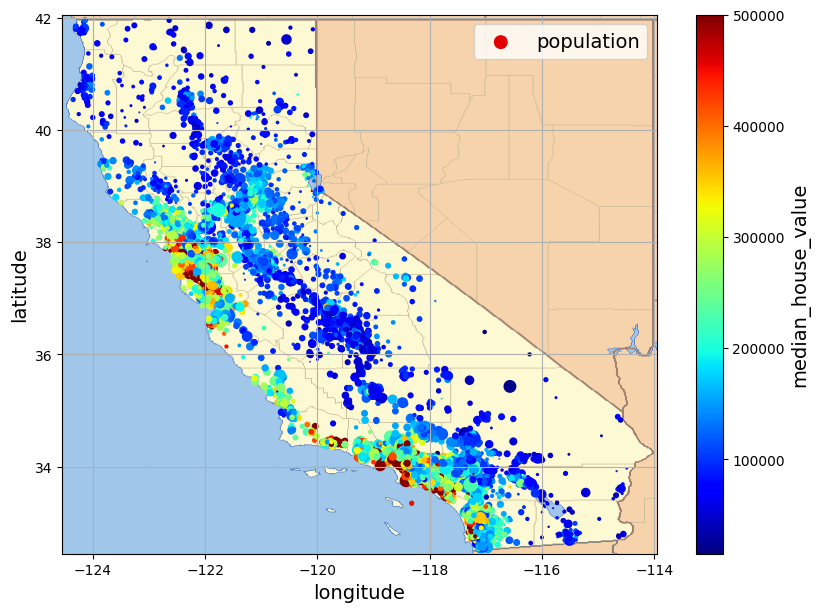

In [460]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=df_train_eda["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
california_img=plt.imread(datapath/"california.png")
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

plt.show()


In [461]:
corr_matrix = housing.corr(numeric_only=True)

In [462]:
corr_matrix=df_train_eda.select_dtypes(np.number).corr()

In [463]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

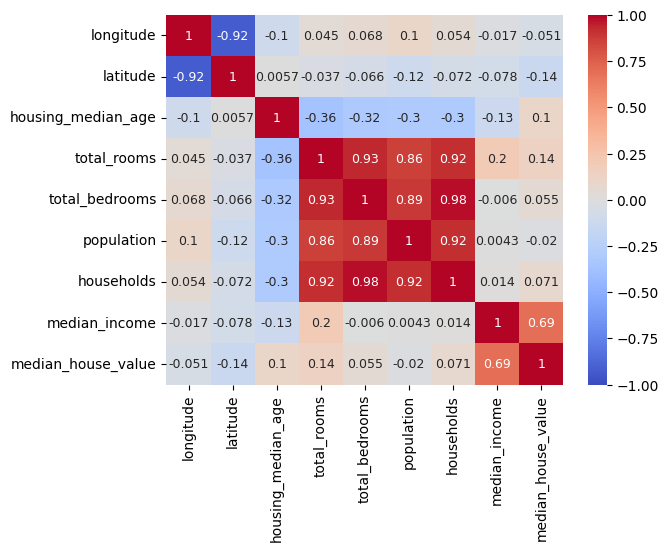

In [464]:
sns.heatmap(corr_matrix, annot=True, annot_kws={'size': 9}, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

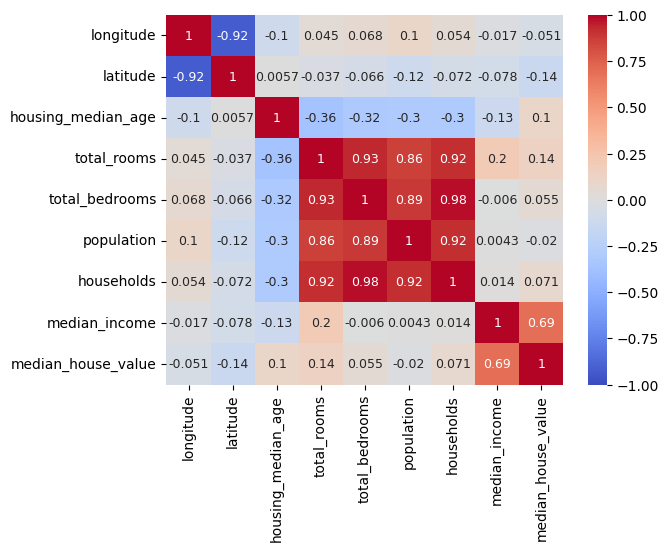

In [465]:
corr_matrix_spearman = df_train_eda.select_dtypes(np.number).corr(method='spearman')
sns.heatmap(corr_matrix, annot=True, annot_kws={'size': 9}, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

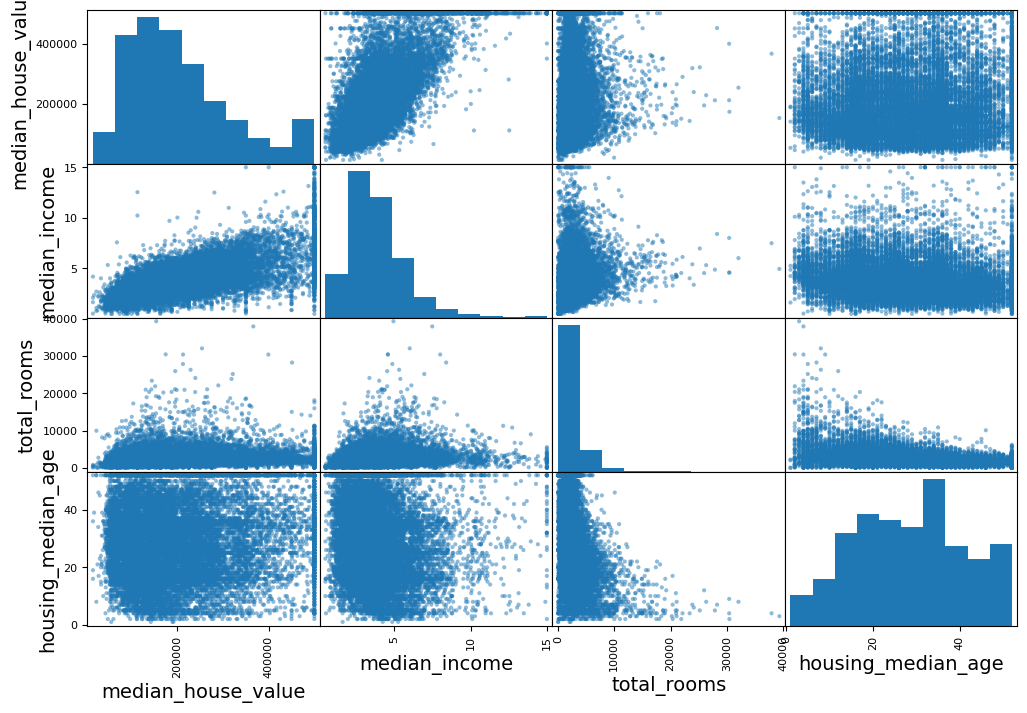

In [466]:

from pandas.plotting import scatter_matrix

attributes=["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df_train_eda[attributes], figsize=(12,8))
plt.show()

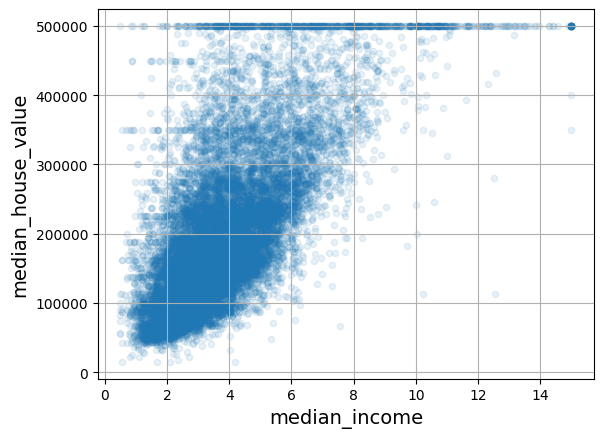

In [467]:

df_train_eda.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)
plt.show()

In [468]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [469]:
corr_matrix = df_train_eda.select_dtypes(np.number).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

In [470]:
X_train = df_train.drop("median_house_value", axis=1)
y_train = df_train["median_house_value"].copy()

In [471]:

df_train.isna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,False,False,False,False,False,False,False,False,False,False
14973,False,False,False,False,False,False,False,False,False,False
3785,False,False,False,False,False,False,False,False,False,False
14689,False,False,False,False,False,False,False,False,False,False
20507,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14207,False,False,False,False,False,False,False,False,False,False
13105,False,False,False,False,False,False,False,False,False,False
19301,False,False,False,False,False,False,False,False,False,False
19121,False,False,False,False,False,False,False,False,False,False


In [472]:
df_train.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [473]:
X_train_option1=X_train.copy()
X_train_option1.dropna(subset=["total_bedrooms"], inplace=True) 

In [474]:
null_rows_idx=X_train.isnull().any(axis=1)
X_train.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN


In [475]:
X_train_option2 = X_train.copy()
X_train_option2.drop("total_bedrooms", axis=1, inplace=True)
X_train_option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,375.0,183.0,9.8020,<1H OCEAN


In [476]:
X_train_option3 = X_train.copy()
median=X_train['total_bedrooms'].median()
X_train_option3["total_bedrooms"].fillna(median, inplace=True)
X_train_option3.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020,<1H OCEAN


In [477]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')

In [478]:
X_train_num=X_train.select_dtypes(
    include=[np.number]
)

In [479]:
imputer.fit(X_train_num)

SimpleImputer(strategy='median')

In [480]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [481]:
X_train_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [482]:
X=imputer.transform(X_train_num)

In [483]:
X

array([[-1.2242e+02,  3.7800e+01,  5.2000e+01, ...,  1.5760e+03,
         1.0340e+03,  2.0987e+00],
       [-1.1838e+02,  3.4140e+01,  4.0000e+01, ...,  6.6600e+02,
         3.5700e+02,  6.0876e+00],
       [-1.2198e+02,  3.8360e+01,  3.3000e+01, ...,  5.6200e+02,
         2.0300e+02,  2.4330e+00],
       ...,
       [-1.1706e+02,  3.2590e+01,  1.3000e+01, ...,  2.8140e+03,
         7.6000e+02,  4.0616e+00],
       [-1.1840e+02,  3.4060e+01,  3.7000e+01, ...,  1.7250e+03,
         8.3800e+02,  4.1455e+00],
       [-1.2241e+02,  3.7660e+01,  4.4000e+01, ...,  6.8200e+02,
         2.1200e+02,  3.2833e+00]])

In [484]:

X_train_tr = pd.DataFrame(X, columns=X_train_num.columns,
                          index=X_train_num.index)
X_train_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [485]:
X_train_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


In [486]:
imputer = SimpleImputer(strategy="median").set_output(transform="pandas")
X = imputer.fit_transform(X_train_num)

In [487]:
X = imputer.transform(X_train_num)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [488]:
X_train_cat = X_train[["ocean_proximity"]]
X_train_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [489]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder().set_output(transform="pandas")
X_train_cat_encoded = ordinal_encoder.fit_transform(X_train_cat)

In [490]:
X_train_cat_encoded.head()

,ocean_proximity
13096,3.0
14973,0.0
3785,1.0
14689,1.0
20507,4.0


In [491]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [492]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder_default = OneHotEncoder().set_output(transform="default")
X_train_cat_1hot_default = cat_encoder_default.fit_transform(X_train_cat)
X_train_cat_1hot_default

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [493]:
X_train_cat_1hot_default.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [494]:
cat_encoder = OneHotEncoder(sparse_output=False).set_output(transform="default")
X_train_cat_1hot_df = cat_encoder.fit_transform(X_train_cat)
X_train_cat_1hot_df

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [495]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [496]:
sample_df = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
sample_df



,ocean_proximity
0,INLAND
1,NEAR BAY


In [497]:
pd.get_dummies(sample_df)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [498]:
cat_encoder.transform(sample_df)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [499]:
sample_unknown_df = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(sample_unknown_df)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [500]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(sample_unknown_df)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [501]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [502]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [503]:
df_output=pd.DataFrame(X_train_cat_1hot_default.toarray(),
                       columns=cat_encoder_default.get_feature_names_out(),
                       index=X_train_cat.index)

In [504]:
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,0.0,0.0,0.0,1.0,0.0
14973,1.0,0.0,0.0,0.0,0.0
3785,0.0,1.0,0.0,0.0,0.0
14689,0.0,1.0,0.0,0.0,0.0
20507,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
14207,1.0,0.0,0.0,0.0,0.0
13105,0.0,1.0,0.0,0.0,0.0
19301,0.0,0.0,0.0,0.0,1.0
19121,1.0,0.0,0.0,0.0,0.0


In [505]:
X_train_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000
mean,-119.573125,35.637746,28.577156,2639.402798,538.949094,1425.513929,499.990189,3.870428
std,2.000624,2.133294,12.585738,2185.287466,423.862079,1094.795467,382.865787,1.891936
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1447.000000,296.000000,787.000000,279.000000,2.562500
50%,-118.510000,34.260000,29.000000,2125.000000,434.000000,1167.000000,408.000000,3.538500
75%,-118.010000,37.720000,37.000000,3154.000000,645.000000,1726.000000,603.000000,4.750000
max,-114.490000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100


In [506]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1)).set_output(transform="pandas")
X_train_min_max_scaled = min_max_scaler.fit_transform(X_train_num)

In [507]:
X_train_min_max_scaled.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000
mean,-0.031060,-0.343033,0.081457,-0.865842,-0.826720,-0.825480,-0.813705,-0.535106
std,0.405806,0.453892,0.493558,0.111160,0.136532,0.134314,0.142940,0.260953
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.482759,-0.706383,-0.333333,-0.926497,-0.904977,-0.903815,-0.896211,-0.715507
50%,0.184584,-0.636170,0.098039,-0.892009,-0.860525,-0.857195,-0.848049,-0.580889
75%,0.286004,0.100000,0.411765,-0.839666,-0.792559,-0.788615,-0.775247,-0.413787
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [508]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler().set_output(transform="pandas")
X_train_num_std_scaled = std_scaler.fit_transform(X_train_num)

In [509]:
X_train_num_std_scaled.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.634400e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-4.837216e-15,-2.580838e-15,-1.473843e-17,-5.916886e-17,2.108500e-17,4.765783e-17,1.463085e-17,7.611267e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000031e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.387765e+00,-1.447452e+00,-2.191210e+00,-1.206927e+00,-1.269200e+00,-1.299382e+00,-1.303343e+00,-1.781577e+00
25%,-1.113124e+00,-8.005453e-01,-8.404335e-01,-5.456668e-01,-5.731971e-01,-5.832443e-01,-5.772176e-01,-6.913383e-01
50%,5.314128e-01,-6.458502e-01,3.359809e-02,-2.354008e-01,-2.476096e-01,-2.361370e-01,-2.402747e-01,-1.754490e-01
75%,7.813423e-01,9.761041e-01,6.692575e-01,2.354897e-01,2.502091e-01,2.744761e-01,2.690575e-01,4.649198e-01
max,2.540847e+00,2.959014e+00,1.861119e+00,1.678576e+01,1.337988e+01,1.359152e+01,1.268893e+01,5.882868e+00


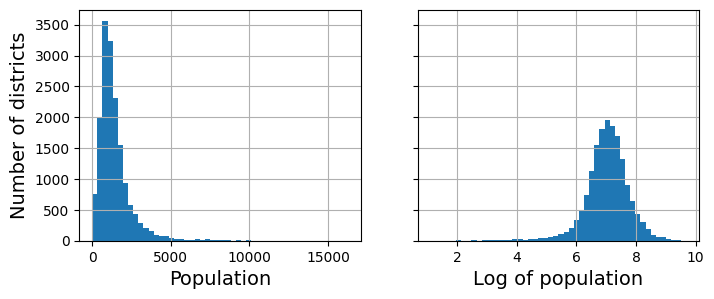

In [510]:
fig,axs=plt.subplots(1,2,figsize=(8,3),sharey=True)
X_train['population'].hist(ax=axs[0],bins=50)
X_train['population'].apply(np.log).hist(ax=axs[1],bins=50)
axs[0].set_xlabel('Population')
axs[1].set_xlabel('Log of population')
axs[0].set_ylabel('Number of districts')
plt.show()

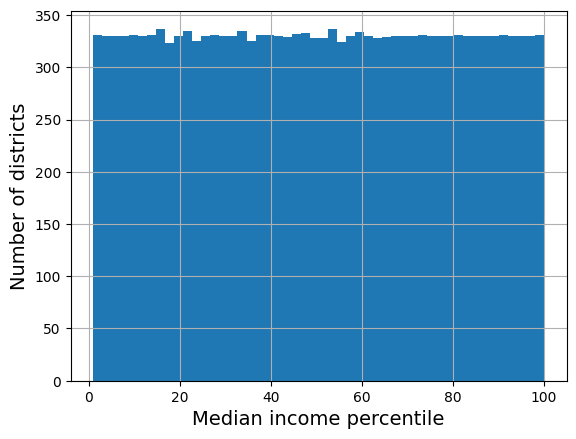

In [511]:
percentiles=[np.percentile(X_train['median_income'],p)
             for p in range(1,100)]
X_train['median_income_percentile']=pd.cut(X_train['median_income'],
bins=[-np.inf]+percentiles+[np.inf],
labels=range(1,100+1))
X_train['median_income_percentile']=X_train['median_income_percentile'].astype(int)
X_train['median_income_percentile'].hist(bins=50)
plt.xlabel('Median income percentile')
plt.ylabel('Number of districts')
plt.show()

In [512]:
X_train.drop("median_income_percentile", axis=1, inplace= True)

<Axes: >

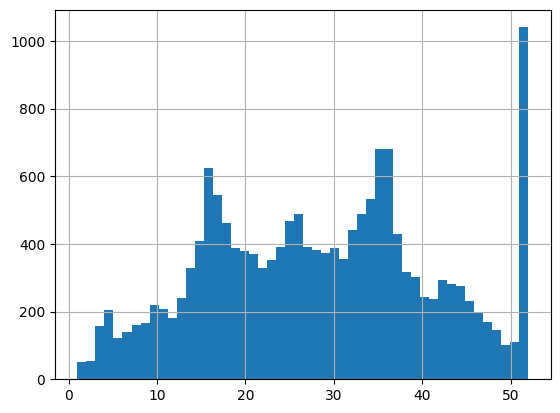

In [513]:
X_train["housing_median_age"].hist(bins=50)

In [514]:
from sklearn.metrics.pairwise import rbf_kernel
X_train['age_simil_35_v1']=rbf_kernel(X_train[['housing_median_age']],[[35]],gamma=0.1)
X_train['age_simil_35_v2']=rbf_kernel(X_train[['housing_median_age']],[[35]],gamma=0.03)

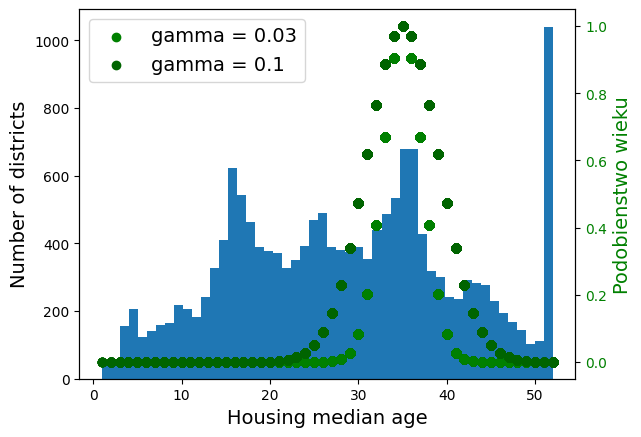

In [515]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(X_train["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
ax2.scatter(X_train["housing_median_age"], X_train["age_simil_35_v1"], color="green", label="gamma = 0.03")
ax2.scatter(X_train["housing_median_age"], X_train["age_simil_35_v2"], color="darkgreen", label="gamma = 0.1")
ax2.tick_params(axis='y', labelcolor="green")
ax2.set_ylabel("Podobienstwo wieku", color="green")

plt.legend(loc="upper left")
plt.show()

In [516]:
X_train.drop(["age_simil_35_v1","age_simil_35_v2"], axis=1, inplace=True)

In [517]:
from sklearn.linear_model import LinearRegression
target_scaler=StandardScaler() #rozwiązanie 1

scaled_labels=target_scaler.fit_transform(y_train.to_frame())
model=LinearRegression()
model.fit(X_train[['median_income']],scaled_labels)
some_new_data=X_train[['median_income']].iloc[:5]
scaled_predictions=model.predict(some_new_data)
predictions=target_scaler.inverse_transform(scaled_predictions)

In [518]:
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

In [519]:
from sklearn.compose import TransformedTargetRegressor #rozwiązanie 2
model=TransformedTargetRegressor(LinearRegression(),
                                 transformer=StandardScaler())
model.fit(X_train[['median_income']],y_train)
predictions=model.predict(some_new_data)

In [520]:
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

Niestandartowe transformatory

In [521]:
from sklearn.preprocessing import FunctionTransformer
log_transformer=FunctionTransformer(np.log,inverse_func=np.exp)
log_pop=log_transformer.transform(X_train[['population']])

In [522]:
log_pop

,population
13096,7.362645
14973,6.501290
3785,6.331502
14689,7.520235
20507,7.555905
...,...
14207,6.843750
13105,7.257708
19301,7.942362
19121,7.452982


In [523]:
from sklearn.preprocessing import FunctionTransformer

rbf_transformer=FunctionTransformer(rbf_kernel,kw_args=dict(Y=[[35.]],gamma=0.1))
age_simil_35=rbf_transformer.transform(housing[['housing_median_age']])

In [524]:
age_simil_35

array([[2.73237224e-02],
       [3.07487988e-09],
       [2.81118530e-13],
       ...,
       [8.48904403e-15],
       [2.81118530e-13],
       [2.09879105e-16]])

In [525]:
sf_coords=37.7749,-122.41
sf_transformer=FunctionTransformer(rbf_kernel,
                                   kw_args=dict(Y=[sf_coords],gamma=0.1))
sf_simil=sf_transformer.transform(housing[['latitude','longitude']])

sf_simil

array([[0.99566482],
       [0.99567518],
       [0.99655196],
       ...,
       [0.6599801 ],
       [0.6752005 ],
       [0.67616077]])

In [526]:
sample_array = np.array([[1., 2.], [3., 4.]])
sample_array

array([[1., 2.],
       [3., 4.]])

In [527]:
ratio_transform=FunctionTransformer(lambda X:X[:,[0]]/X[:,[1]])
ratio_transform.transform(sample_array)

array([[0.5 ],
       [0.75]])

In [528]:
from sklearn.base import BaseEstimator ,TransformerMixin
from sklearn.utils.validation import check_array,check_is_fitted
class StandardScalerClone(BaseEstimator,TransformerMixin):

    def __init__(self,with_mean=True):
        self.with_mean=with_mean
    def fit(self,X,y=None):
        X=check_array(X)
        self.mean_=X.mean(axis=0)
        self.scale_=X.std(axis=0)
        self.n_features_in_=X.shape[1]
        return self
    def transform(self,X):
        check_is_fitted(self)
        X=check_array(X)
        assert self.n_features_in_==X.shape[1]
        if self.with_mean:
            X=X-self.mean_
        return X/self.scale_

In [529]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator,TransformerMixin):
    def __init__(self,n_clusters=10,gamma=1.0,random_state=None):
        self.n_clusters=n_clusters
        self.gamma=gamma
        self.random_state=random_state
    def fit(self,X,y=None,sample_weight=None):
        self.kmeans_=KMeans(self.n_clusters,random_state=self.random_state)
        self.kmeans_.fit(X,sample_weight=sample_weight)
        return self
    def transform(self,X):
        return rbf_kernel(X,self.kmeans_.cluster_centers_,gamma=self.gamma)
    def get_feature_names_out(self,names=None):
        return [f'Podobieństwo {i} skupienia' for i in range(self.n_clusters)]

In [530]:
cluster_simil=ClusterSimilarity(n_clusters=10,gamma=1.,random_state=42)
similarities=cluster_simil.fit_transform(
    X_train[['latitude','longitude']],
    sample_weight=y_train
)

In [531]:
similarities[:3].round(2)

array([[0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.13, 0.55, 0.  , 0.56],
       [0.64, 0.  , 0.11, 0.04, 0.  , 0.  , 0.  , 0.  , 0.99, 0.  ],
       [0.  , 0.65, 0.  , 0.  , 0.01, 0.  , 0.49, 0.59, 0.  , 0.28]])

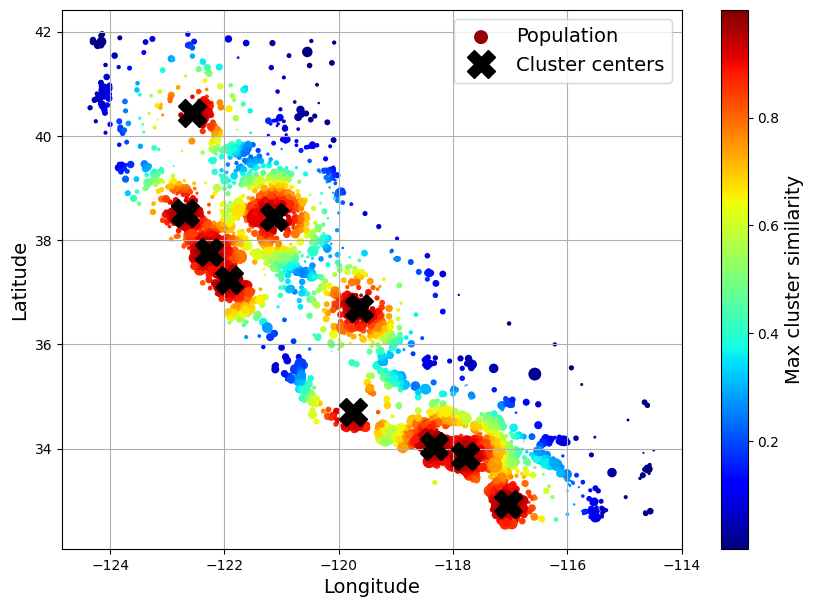

In [532]:
X_train_renamed = X_train.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
X_train_renamed["Max cluster similarity"] = similarities.max(axis=1)

X_train_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=X_train_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
plt.show()

In [533]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [534]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [535]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [536]:
X_train_num_prepared = num_pipeline.fit_transform(X_train_num)
X_train_num_prepared=pd.DataFrame(
    X_train_num_prepared,
    columns=num_pipeline.get_feature_names_out(),
    index=X_train_num.index
)
X_train_num_prepared.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-4.837216e-15,-2.580838e-15,-1.473843e-17,-5.916886e-17,1.039220e-16,4.765783e-17,1.463085e-17,7.611267e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.387765e+00,-1.447452e+00,-2.191210e+00,-1.206927e+00,-1.272777e+00,-1.299382e+00,-1.303343e+00,-1.781577e+00
25%,-1.113124e+00,-8.005453e-01,-8.404335e-01,-5.456668e-01,-5.710538e-01,-5.832443e-01,-5.772176e-01,-6.913383e-01
50%,5.314128e-01,-6.458502e-01,3.359809e-02,-2.354008e-01,-2.462699e-01,-2.361370e-01,-2.402747e-01,-1.754490e-01
75%,7.813423e-01,9.761041e-01,6.692575e-01,2.354897e-01,2.468327e-01,2.744761e-01,2.690575e-01,4.649198e-01
max,2.540847e+00,2.959014e+00,1.861119e+00,1.678576e+01,1.344681e+01,1.359152e+01,1.268893e+01,5.882868e+00


In [537]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [538]:
num_pipeline[1]

StandardScaler()

In [539]:
num_pipeline[:-1]

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

In [540]:
num_pipeline.named_steps["simpleimputer"]

SimpleImputer(strategy='median')

In [541]:
num_pipeline.set_params(simpleimputer__strategy="median")

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [542]:
from sklearn.compose import ColumnTransformer

num_attribs=["longitude","latitude","housing_median_age","total_rooms",
             "total_bedrooms","population","households","median_income"]
cat_attribs=["ocean_proximity"]
cat_pipeline=make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)
preprocessing=ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",cat_pipeline,cat_attribs)
])
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ocean_proximity'])])

In [543]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)
preprocessing

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000200FFF39420>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002008537B250>)])

In [544]:
X_train_prepared = preprocessing.fit_transform(X_train)

In [545]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)


In [546]:
X_train_prepared = preprocessing.fit_transform(X_train)
X_train_prepared.shape

(16512, 24)

In [547]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Podobieństwo 0 skupienia',
       'geo__Podobieństwo 1 skupienia', 'geo__Podobieństwo 2 skupienia',
       'geo__Podobieństwo 3 skupienia', 'geo__Podobieństwo 4 skupienia',
       'geo__Podobieństwo 5 skupienia', 'geo__Podobieństwo 6 skupienia',
       'geo__Podobieństwo 7 skupienia', 'geo__Podobieństwo 8 skupienia',
       'geo__Podobieństwo 9 skupienia', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

In [548]:
X_train_prepared_df = pd.DataFrame(
   X_train_prepared,
   columns = preprocessing.get_feature_names_out(),
   index = X_train.index
)
X_train_prepared_df

,bedrooms__ratio,rooms_per_house__ratio,people_per_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,geo__Podobieństwo 0 skupienia,geo__Podobieństwo 1 skupienia,...,geo__Podobieństwo 6 skupienia,geo__Podobieństwo 7 skupienia,geo__Podobieństwo 8 skupienia,geo__Podobieństwo 9 skupienia,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__housing_median_age
13096,1.846624,-0.866027,-0.330204,1.324114,0.637892,0.456906,1.310369,-1.071522,4.581829e-01,1.241847e-14,...,8.489216e-04,9.770322e-01,2.382191e-08,3.819126e-18,0.0,0.0,0.0,1.0,0.0,1.861119
14973,-0.508121,0.024550,-0.253616,-0.252671,-0.063576,-0.711654,-0.142030,1.194712,6.511495e-10,9.579596e-01,...,5.614049e-27,1.260964e-13,1.103491e-01,3.547610e-01,1.0,0.0,0.0,0.0,0.0,0.907630
3785,-0.202155,-0.041193,-0.051041,-0.925266,-0.859927,-0.941997,-0.913030,-0.756981,3.432506e-01,4.261141e-15,...,5.641131e-03,7.303265e-01,2.508224e-08,2.669659e-18,0.0,1.0,0.0,0.0,0.0,0.351428
14689,-0.149006,-0.034858,-0.141475,0.952773,0.943475,0.670700,0.925373,-0.912253,2.244844e-15,2.704823e-01,...,5.913326e-35,5.201263e-20,1.712982e-03,8.874598e-01,0.0,1.0,0.0,0.0,0.0,-0.919891
20507,0.963208,-0.666554,-0.306148,1.437622,1.003590,0.719093,1.481464,0.034537,1.090228e-11,9.422206e-01,...,5.421817e-30,1.048030e-15,2.568824e-02,5.279506e-01,0.0,0.0,0.0,0.0,1.0,0.589800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,0.804368,-0.452111,-0.269780,0.465581,0.109720,-0.247054,0.379471,0.648953,1.115293e-10,9.505920e-01,...,1.878046e-28,1.651285e-14,4.776856e-02,3.463930e-01,1.0,0.0,0.0,0.0,0.0,0.987087
13105,-0.192328,0.036792,-0.073741,0.454022,0.477277,0.314542,0.402773,-0.637675,1.409886e-03,1.430917e-03,...,7.663746e-14,9.538119e-06,4.530237e-01,9.507766e-05,0.0,1.0,0.0,0.0,0.0,-0.443146
19301,-0.242492,-0.109987,0.158542,0.824206,0.859552,1.243381,0.889897,0.333540,8.098794e-20,3.501819e-02,...,1.715187e-42,5.158970e-25,5.966953e-06,1.346576e-01,0.0,0.0,0.0,0.0,1.0,-1.237721
19121,0.259775,-0.360937,-0.210332,0.987851,0.811293,0.579462,1.023329,0.377051,4.385614e-10,9.667073e-01,...,2.464809e-27,8.018690e-14,8.956217e-02,3.478114e-01,1.0,0.0,0.0,0.0,0.0,0.669257


In [549]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X=X_train_prepared_df, y=y_train)

LinearRegression()

In [550]:
X_train_predictions = lin_reg.predict(X_train_prepared_df)

In [551]:
print(X_train_predictions[:5].round(-2))
print(y_train.iloc[:5].values)

[246000. 372700. 135700.  91400. 330900.]
[458300. 483800. 101700.  96100. 361800.]


In [552]:
from sklearn.metrics import root_mean_squared_error

lin_rmse = root_mean_squared_error(y_true = y_train, y_pred=X_train_predictions)
lin_rmse

68972.88910758533

<Axes: >

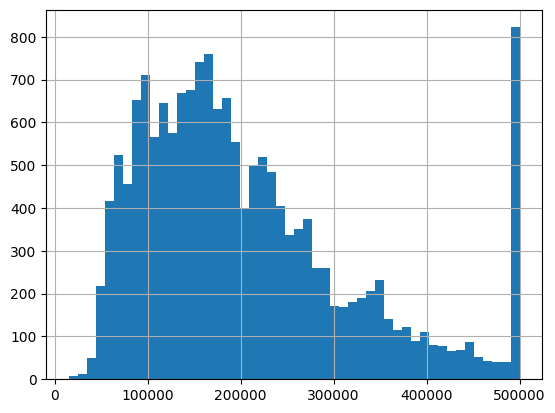

In [553]:
y_train.hist(bins=50)

In [554]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor(random_state=42)
tree_reg.fit(X=X_train_prepared_df,y=y_train)

DecisionTreeRegressor(random_state=42)

In [555]:
X_train_predictions=tree_reg.predict(X_train_prepared_df)
tree_rmse=root_mean_squared_error(y_true=y_train,y_pred=X_train_predictions)
tree_rmse

0.0

In [556]:
from sklearn.model_selection import cross_val_score

tree_rmse = -cross_val_score(
    estimator = tree_reg,
    X = X_train_prepared_df,
    y = y_train,
    scoring = "neg_root_mean_squared_error",
    cv = 10
)
tree_rmse

array([67672.69014757, 66043.1263581 , 63204.40145629, 66213.29476161,
       63007.29810755, 68252.66498511, 62602.42470322, 68361.19994604,
       69853.96073029, 66283.57405502])

In [557]:
pd.Series(tree_rmse).describe()

count       10.000000
mean     66149.463525
std       2505.997238
min      62602.424703
25%      63914.082682
50%      66248.434408
75%      68107.671276
max      69853.960730
dtype: float64

In [558]:
lin_rmse = -cross_val_score(
    estimator = lin_reg,
    X = X_train_prepared_df,
    y = y_train,
    scoring = "neg_root_mean_squared_error",
    cv = 10
)
lin_rmse

array([70101.80065995, 68470.55398928, 66092.69971364, 80822.01371456,
       68919.43420247, 69102.09697485, 68244.90298195, 71936.99367172,
       68316.08384534, 70042.78681027])

In [559]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_rmses = -cross_val_score(
    estimator=forest_reg,
    X=X_train_prepared_df,
    y=y_train,
    scoring ="neg_root_mean_squared_error",
    cv = 10
)

In [560]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47174.587364
std        996.823918
min      45617.905147
25%      46559.165989
50%      47225.189327
75%      47495.894845
max      49392.754151
dtype: float64

In [561]:
forest_reg.fit(X = X_train_prepared_df, y = y_train)
X_train_predictions = forest_reg.predict(X_train_prepared_df)
forest_rmse = root_mean_squared_error(y_true = y_train, y_pred = X_train_predictions)
forest_rmse

17519.685029292894

In [562]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
     {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(X=X_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000200852F1330>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [563]:
print(str(full_pipeline.get_params().keys())[:1000] + "...")

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'random_forest', 'preprocessing__force_int_remainder_cols', 'preprocessing__n_jobs', 'preprocessing__remainder__memory', 'preprocessing__remainder__steps', 'preprocessing__remainder__verbose', 'preprocessing__remainder__simpleimputer', 'preprocessing__remainder__standardscaler', 'preprocessing__remainder__simpleimputer__add_indicator', 'preprocessing__remainder__simpleimputer__copy', 'preprocessing__remainder__simpleimputer__fill_value', 'preprocessing__remainder__simpleimputer__keep_empty_features', 'preprocessing__remainder__simpleimputer__missing_values', 'preprocessing__remainder__simpleimputer__strategy', 'preprocessing__remainder__standardscaler__copy', 'preprocessing__remainder__standardscaler__with_mean', 'preprocessing__remainder__standardscaler__with_std', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose', 'prepro

In [564]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [565]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x0000020...
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000020081773970>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

In [566]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,6.525215,0.549922,0.166952,0.028584,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-43520.694854,-43958.237963,-44759.841846,-44079.591555,513.105796,1
13,8.326735,0.954495,0.234243,0.089205,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-44027.285408,-44179.627865,-45007.255144,-44404.722806,430.570141,2
14,10.742942,0.169058,0.197628,0.034680,15,10,"{'preprocessing__geo__n_clusters': 15, 'random...",-44402.775080,-44618.770051,-45423.947846,-44815.164326,439.413615,3
7,13.390311,0.293862,0.340026,0.034255,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44250.873441,-44825.226423,-45610.878897,-44895.659587,557.449151,4
9,13.676688,0.101222,0.352818,0.007620,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44250.873441,-44825.226423,-45610.878897,-44895.659587,557.449151,4


In [567]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
   full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
   scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(X=X_train, y=y_train)


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020081773F10>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020081773A90>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [568]:
# dodatkowy kod - wyswietla wyniki przeszukiwania losowego
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="rank_test_score", ascending=True, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,10.044671,0.138892,0.203678,0.017972,45,9,"{'preprocessing__geo__n_clusters': 45, 'random...",-41204.253373,-42108.203702,-42997.977688,-42103.478254,732.292508,1
8,8.554972,0.257201,0.202496,0.011015,32,7,"{'preprocessing__geo__n_clusters': 32, 'random...",-41991.365603,-42556.901035,-43431.427462,-42659.898033,592.396728,2
5,6.073060,0.333340,0.226702,0.032858,42,4,"{'preprocessing__geo__n_clusters': 42, 'random...",-42030.576161,-42968.400482,-43616.526368,-42871.834337,651.052112,3
0,19.304681,1.659386,0.203118,0.042564,41,16,"{'preprocessing__geo__n_clusters': 41, 'random...",-42580.486638,-42868.652778,-43604.118879,-43017.752765,430.990213,4
2,9.258103,0.506640,0.189739,0.010406,23,8,"{'preprocessing__geo__n_clusters': 23, 'random...",-42420.893552,-42841.063629,-44231.742930,-43164.566704,773.858104,5


In [569]:
final_model = rnd_search.best_estimator_
final_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x0000020...
                                                  ClusterSimilarity(n_clusters=45,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000200817BF730>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=9, random_state=42))])

Analizowanie najlepszych modeli i ich bledow 

In [570]:
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.06, 0.06, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.02, 0.01,
       0.02, 0.01, 0.  , 0.01, 0.01, 0.01, 0.02, 0.01, 0.  , 0.01, 0.01,
       0.01, 0.  , 0.01, 0.  , 0.02, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01,
       0.02, 0.02, 0.01, 0.01, 0.01, 0.04, 0.01, 0.02, 0.01, 0.01, 0.01,
       0.02, 0.01, 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.08,
       0.  , 0.  , 0.  , 0.01])

In [571]:
sorted(
   zip(
      feature_importances,
      final_model["preprocessing"].get_feature_names_out()
   ),
   reverse=True
)

[(0.18836603202647126, 'log__median_income'),
 (0.07795960969938898, 'cat__ocean_proximity_INLAND'),
 (0.06110388595864347, 'bedrooms__ratio'),
 (0.05772194900488602, 'rooms_per_house__ratio'),
 (0.04569274355282605, 'people_per_house__ratio'),
 (0.041977095119231075, 'geo__Podobieństwo 30 skupienia'),
 (0.024893290428216707, 'geo__Podobieństwo 9 skupienia'),
 (0.02349145973584661, 'geo__Podobieństwo 36 skupienia'),
 (0.021384735075780065, 'geo__Podobieństwo 18 skupienia'),
 (0.019231937253583756, 'geo__Podobieństwo 3 skupienia'),
 (0.019114201150802552, 'geo__Podobieństwo 32 skupienia'),
 (0.01740110192655986, 'geo__Podobieństwo 25 skupienia'),
 (0.016281601452371793, 'geo__Podobieństwo 1 skupienia'),
 (0.015974756525084677, 'geo__Podobieństwo 26 skupienia'),
 (0.014014150061434243, 'geo__Podobieństwo 7 skupienia'),
 (0.013588284206905332, 'geo__Podobieństwo 10 skupienia'),
 (0.01344850861123562, 'geo__Podobieństwo 12 skupienia'),
 (0.013432151644106247, 'geo__Podobieństwo 34 skupieni

In [572]:
X_test = df_test.drop("median_house_value", axis=1)
y_test = df_test["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = root_mean_squared_error(y_true=y_test, y_pred=final_predictions)
print(final_rmse)

41422.168800999665


In [573]:
from scipy import stats

squared_errors = (final_predictions-y_test) ** 2
alpha = 0.05 # poziom istotnosci
np.sqrt(stats.t.interval(
   1 - alpha, # poziom ufnosci
   len(squared_errors) - 1, # liczba stopni swobody (df = n-1)
   loc=squared_errors.mean(), # srednia z kwadratow bledow
   scale=stats.sem(squared_errors) # blad standaryzowany dla sredniej
   )
)

array([39272.70918656, 43465.46272048])

In [574]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf(1-alpha / 2, df = m - 1)
tmargin= tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(39272.70918655866, 43465.4627204751)

Zapisanie stanu modelu za pomoca narzedzia joblib

In [576]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

In [578]:
import joblib 

# dodatkowy kod - pominiety dla zachowania zwieklosci 
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
   return X[:, [0]] / X[:, [1]]

final_model_reloaded = joblib.load("my_california_housing_model.pkl")
 
new_data = X_train.iloc[:5]  # pretend these are new districts
predictions - final_model_reloaded.predict(new_data)

array([-308210.95724123, -158462.72155566,   39352.37185694,
         38735.33653057, -138620.40442361])

In [579]:
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])